#Question: Why are we doing this prediction
The reason for doing this analysis is to predict whether the employee stays with the current company or else leave it. When it comes to hiring, companies hire the best people who seems right fit for the given role. Even then the employee attrition is one thing that keeps employeers in peril as it's difficult to find another great fit for the position & also it's costly as well as time consuming. We have 34 various features that helps us to find on what causes the employee to leave the company.

#Data set:
https://www.kaggle.com/code/yoojink/employee-attrition-analysis-eda-and-modeling/data

About data

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

Importing python libraries required to read our dataset. Drive has been mounted so that we don't need to upload the dataset every often whenever we pause & continue work after a while.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/HR Employee Attrition.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


* Vizualizing the features(columns) from the dataset & understanding the fields that are required for output variable 'Attrition'

Looking deep into the rows of every column to check how many unique & null values each feature have for better understanding

In [ ]:
tabel = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'NaNN':df.isna().sum(),
    'Type':df.dtypes.values
})
tabel

,Unique,Null,NullPercent,NaNN,Type
Age,43,0,0.00,0,int64
Attrition,2,0,0.00,0,object
BusinessTravel,3,0,0.00,0,object
DailyRate,886,0,0.00,0,int64
Department,3,0,0.00,0,object
DistanceFromHome,29,0,0.00,0,int64
Education,5,0,0.00,0,int64
EducationField,6,0,0.00,0,object
EmployeeCount,1,0,0.00,0,int64
EmployeeNumber,1470,0,0.00,0,int64


* From the above table we can see that some features like 'Employeecount', 'Over18' has same value. So, it's better to drop those columns as the probability & distribution will be affected which leads to overfitting of data & inaccurate prediction.

In [ ]:
# Dropping features which are unnecessary churn for prediction

new_df = df.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


* From the above table, after dropping some columns we can see that columns like 'Department', "EducationField' & so one are categorical features and the values are in string variables. We need to convert these strings to int values so that mathematical functions & regressional analysis can be performed. Before that let's explore the data with EDA.

#Exploratory Data Analysis

 When it comes to attrition we have to keep in mind some common factors that most likely to contribute for employee attrition like Job fields, Educationalfield, Gender, Age, Maritial status, Education provides some insights on what our data is exactly speaking.
* Now let's explore the important features & check who are more likely to leave their jobs

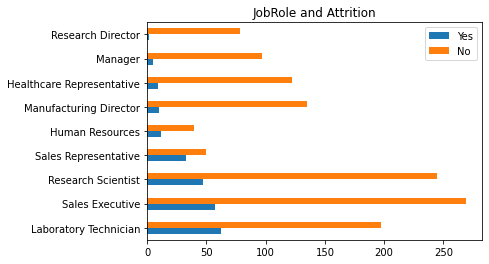

In [ ]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['JobRole'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['JobRole'].value_counts()

n_df.plot.barh(title = 'JobRole and Attrition')

* From above we can see that 'Laboratory Technician', 'Sales Executive', 'Research Scientist' are more likely to leave their jobs compared to other fields.

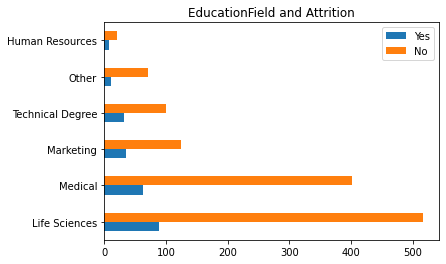

In [ ]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['EducationField'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['EducationField'].value_counts()

n_df.plot.barh(title = 'EducationField and Attrition')

* Employees from Life Sciences & Medical background are more in dataset, so the attrition rates are in these fields as well which is obvious.

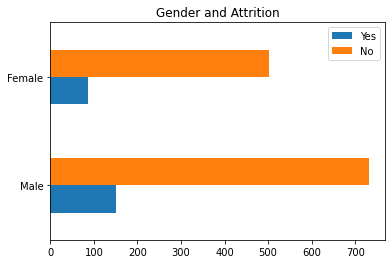

In [ ]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['Gender'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['Gender'].value_counts()

n_df.plot.barh(title = 'Gender and Attrition')

* Men are more likely to leave the jobs compared to women

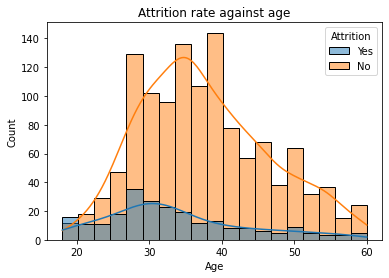

In [ ]:
import seaborn as sns

sns.histplot(data=df,x='Age',hue='Attrition',kde=True)
plt.title(label='Attrition rate against age')
plt.show()

* Age bracket between 25-35 are more likely to leave the jobs.

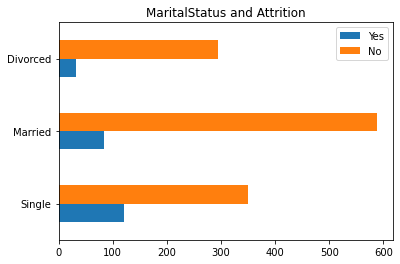

In [ ]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['MaritalStatus'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['MaritalStatus'].value_counts()

n_df.plot.barh(title = 'MaritalStatus and Attrition')

* Single men are more likely to leave the job which is intresting to know from above plot

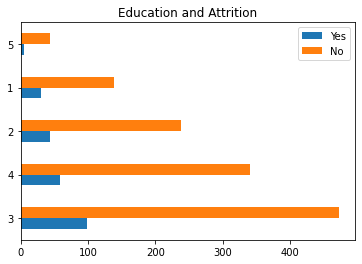

In [ ]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['Education'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['Education'].value_counts()

n_df.plot.barh(title = 'Education and Attrition')

Education

1 'Below College' 

2 'College' 

3 'Bachelor' 

4 'Master' 

5 'Doctor'

* Most of the people have atleast bachelor's degree or higher.

# Correlation Matrix

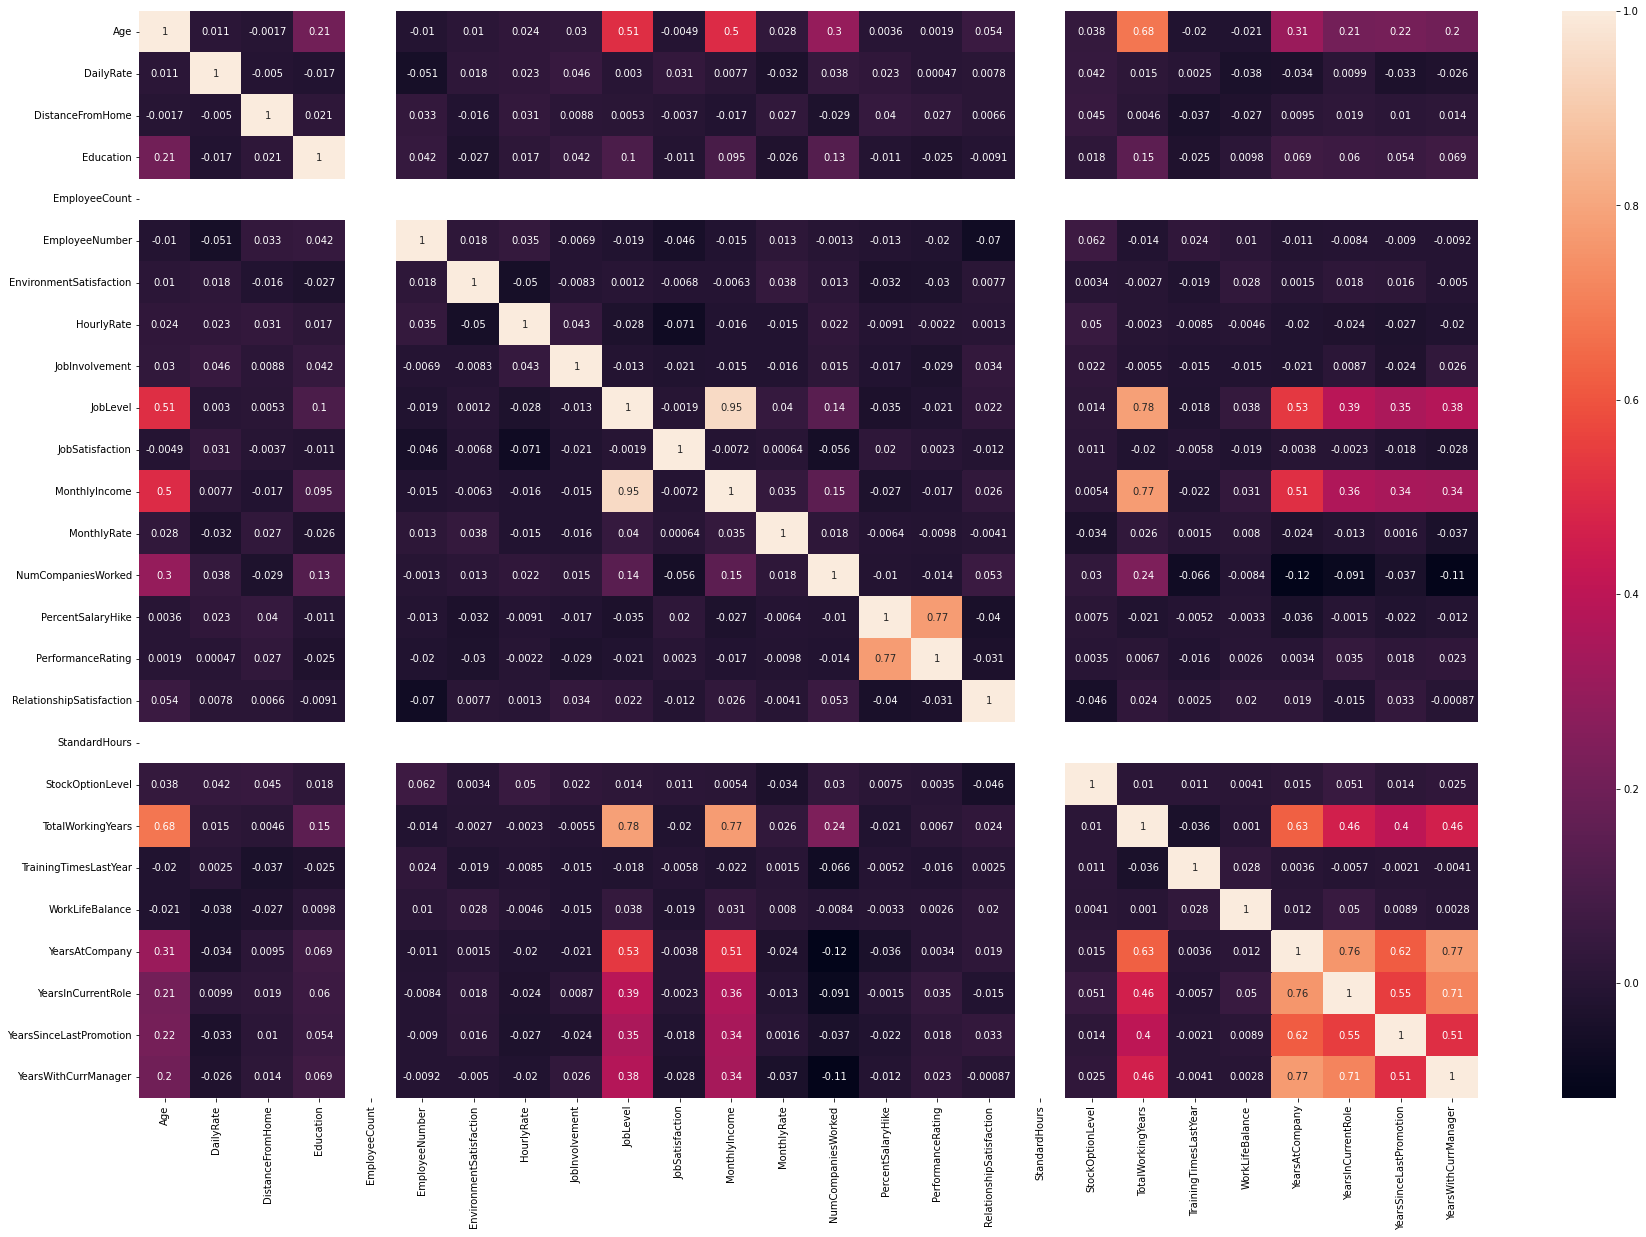

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

There will be correlation between features in someway but to remove overfitting we should eliminate highly correlated features. Let's keep our correlation threshold to 80% & remove the features with more than 80% correlation.

* From the heatmap we can see that 'JobLevel', 'MonthlyIncome' are highly correlated at 95%. So, let's drop one of the feature.

In [ ]:
new_df = new_df.drop(columns='JobLevel')

In [ ]:
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


* Out of 35 columns 5 features has been removed finally with our Exploratoty Data Analysis

#Converting data types

In [ ]:
# Converting categorical features dtype to int dtype 

from sklearn.preprocessing import LabelEncoder

for column in new_df.columns:
    fields = []
    if new_df[column].dtype == 'object':
        encoder = LabelEncoder()
        new_df[column] = encoder.fit_transform(new_df[column].values)

In [ ]:
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


# Different Models 

#Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_df = new_df.drop(columns=['Attrition'])
X = x_df
y = new_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)
accuracy_score(y_test, log_reg_pred)*100

85.71428571428571

#Ride Regression

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_reg_model = RidgeClassifier()
ridge_reg_model.fit(X_train, y_train)
ridge_reg_model = ridge_reg_model.predict(X_test)
accuracy_score(y_test, ridge_reg_model)*100

print("Accuracy:", metrics.accuracy_score(ridge_reg_model,y_test)*100)
print(metrics.classification_report(ridge_reg_model, y_test))

Accuracy: 88.77551020408163
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       288
           1       0.15      1.00      0.27         6

    accuracy                           0.89       294
   macro avg       0.58      0.94      0.60       294
weighted avg       0.98      0.89      0.93       294



Ridge Regression had better model performance with accuracy 89%

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

#AdaBoost

In [ ]:
ada = AdaBoostClassifier(n_estimators=200)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada.fit(X_train, y_train)

print("Accuracy:", metrics.accuracy_score(ada_pred,y_test)*100)
print(metrics.classification_report(ada_pred, y_test))

Accuracy: 87.07482993197279
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       265
           1       0.38      0.52      0.44        29

    accuracy                           0.87       294
   macro avg       0.66      0.71      0.68       294
weighted avg       0.89      0.87      0.88       294



#Bagging Classifier

In [ ]:
bag = BaggingClassifier(n_estimators=200)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag.fit(X_train, y_train)

print("Accuracy:", metrics.accuracy_score(bag_pred,y_test)*100)
print(metrics.classification_report(bag_pred, y_test))

Accuracy: 86.73469387755102
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       282
           1       0.15      0.50      0.24        12

    accuracy                           0.87       294
   macro avg       0.57      0.69      0.58       294
weighted avg       0.94      0.87      0.90       294



#Gradient Boosting

In [ ]:
grad = GradientBoostingClassifier(n_estimators=200)
grad.fit(X_train, y_train)
grad_pred = bag.predict(X_test)
grad.fit(X_train, y_train)

print("Accuracy:", metrics.accuracy_score(grad_pred,y_test)*100)
print(metrics.classification_report(grad_pred, y_test))

Accuracy: 86.39455782312925
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       281
           1       0.15      0.46      0.23        13

    accuracy                           0.86       294
   macro avg       0.56      0.67      0.58       294
weighted avg       0.94      0.86      0.89       294



#Random Forest

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rclf = RandomForestClassifier(n_estimators=250)
rclf.fit(X_train, y_train)
random_pred = rclf.predict(X_test)
rclf.fit(X_train, y_train)

print("Accuracy:", metrics.accuracy_score(random_pred,y_test)*100)
print(metrics.classification_report(random_pred, y_test))

Accuracy: 87.75510204081633
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       289
           1       0.10      0.80      0.18         5

    accuracy                           0.88       294
   macro avg       0.55      0.84      0.56       294
weighted avg       0.98      0.88      0.92       294



Out of all the tree based models Random Forest has better with 88%

#Installing shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models.sort_values('Accuracy', ascending=False))

100%|██████████| 29/29 [00:04<00:00,  6.14it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.90               0.68     0.68      0.88   
RidgeClassifier                    0.89               0.58     0.58      0.85   
RidgeClassifierCV                  0.89               0.58     0.58      0.85   
LinearSVC                          0.89               0.62     0.62      0.86   
SVC                                0.89               0.58     0.58      0.85   
AdaBoostClassifier                 0.88               0.65     0.65      0.87   
LinearDiscriminantAnalysis         0.88               0.65     0.65      0.87   
XGBClassifier                      0.88               0.61     0.61      0.86   
LGBMClassifier                     0.88               0.59     0.59      0.85   
CalibratedClassifierCV             0.88               0.58     0.58      0.85   
RandomForestClassifier      

#How well did it work?
For all of the models the metrics are as expected compared to the above automl predictions except for logistic regression.

# Model Interpretability

#Shap Analysis for Logistic Regression

In [ ]:
import shap
shap.initjs()

In [ ]:
from sklearn.pipeline import Pipeline
explainer = shap.Explainer(log_reg_model.predict, X_train)
shap_values = explainer(X_test)

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

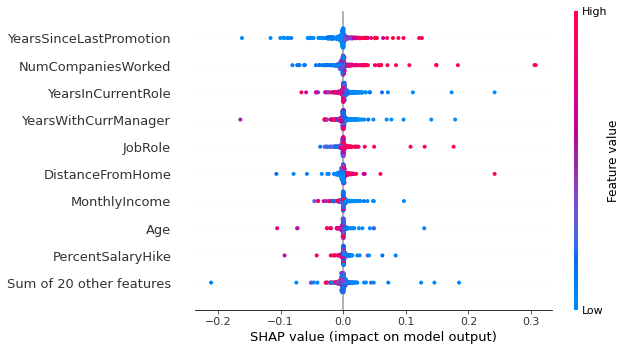

In [ ]:
shap.plots.beeswarm(shap_values)

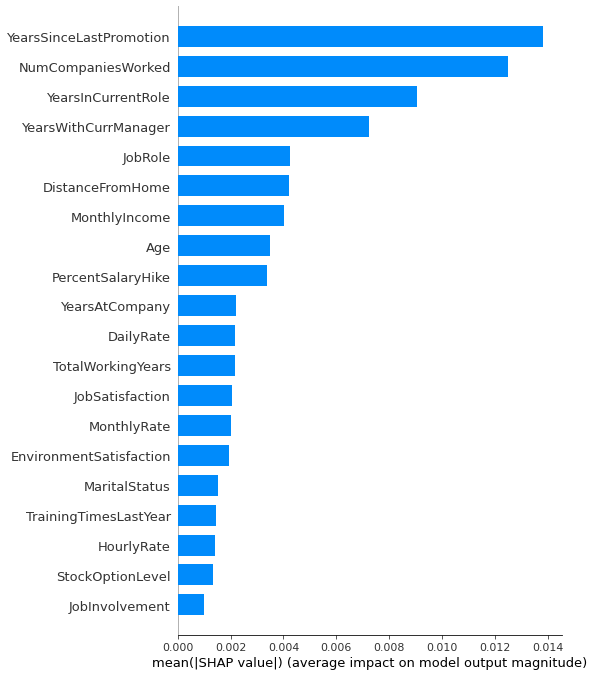

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

* Most important features in Logistic Regression are 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'YearsInCurrentRole, ''YearsWithCurrManager' so on.

#Shap Analysis for Bagging Classifier

In [ ]:
from sklearn.pipeline import Pipeline
explainer = shap.Explainer(bag.predict, X_train)
shap_values = explainer(X_test)

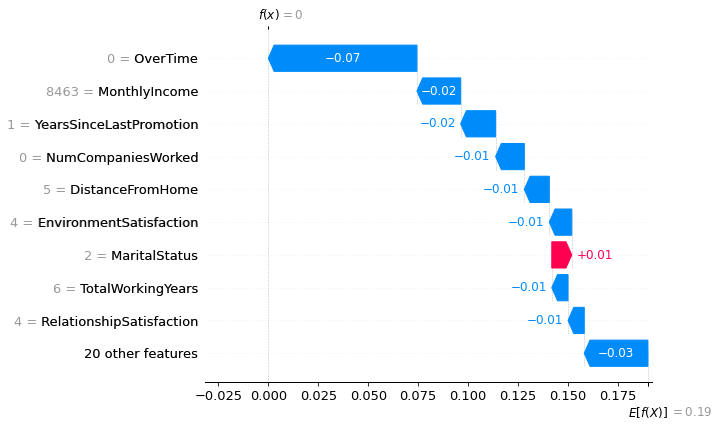

In [ ]:
sample_feature_importance(0, 'waterfall')

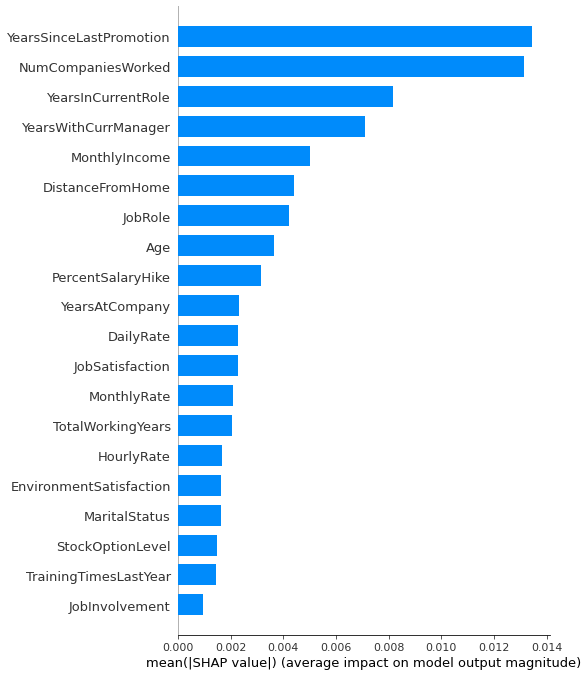

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

* Most important features in Bagging Technique are 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'YearsInCurrRole', 'YearsWithCurrManager'

#Shap Analysis for Random forest

In [ ]:
from sklearn.pipeline import Pipeline
explainer = shap.Explainer(rclf.predict, X_train)
shap_values = explainer(X_test)

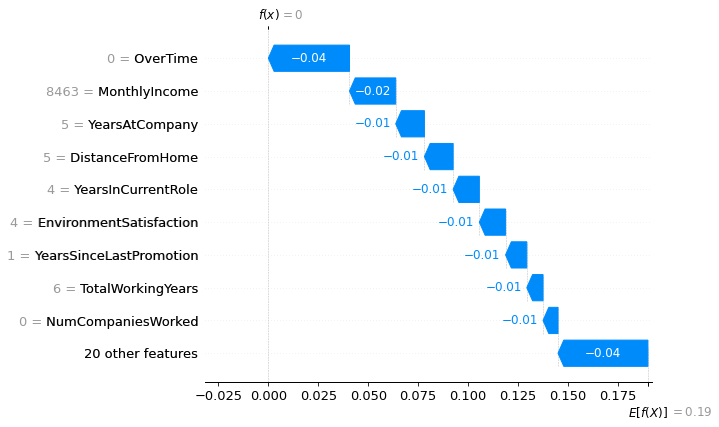

In [ ]:
sample_feature_importance(0, 'waterfall')

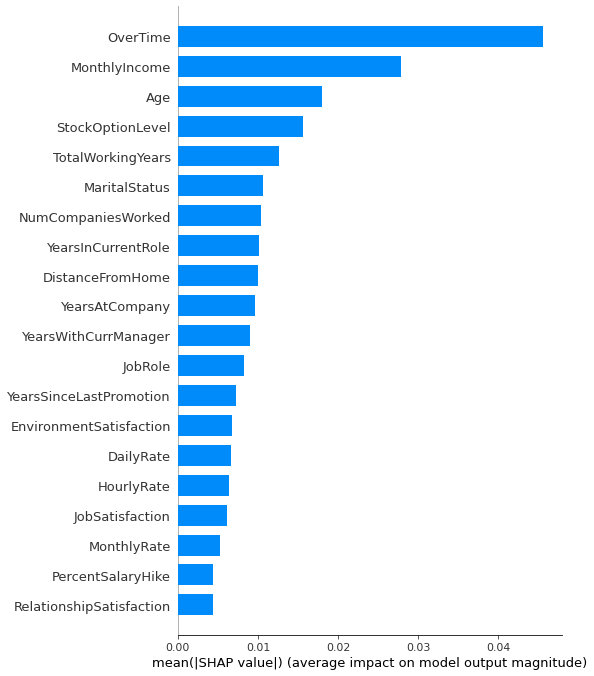

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

* Most important features in Random Forest are 'OverTime', 'MonthlyIncome', 'Age', 'StockOptionLevel'

#What did I learn?
It's intresting to see how different models uses different features for prediction which leads to better accuracy.

EDA helped in exploring the details of data & removing the unwanted or correlated features.